# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [2]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,169,98,38,70,125,52,8,130,53,18,139,157,243,132,74,0,13,186,185
1,134,102,54,100,163,53,10,213,31,24,173,219,669,201,76,12,27,187,195
2,521,93,40,73,139,58,6,136,49,18,138,166,275,137,73,0,0,187,188
3,605,97,53,105,225,71,12,221,30,25,167,226,713,202,70,3,20,186,200
4,739,96,44,85,166,66,10,155,43,19,150,167,355,159,67,3,10,192,202
5,832,108,49,109,204,61,11,212,31,24,159,229,665,215,71,16,11,190,199
6,574,104,55,105,216,68,11,205,32,23,169,221,623,216,71,9,18,189,196
7,382,81,46,71,141,61,7,153,44,19,148,177,347,190,80,1,14,182,187
8,821,104,56,96,231,74,11,220,30,25,172,223,713,218,73,6,16,186,195
9,709,95,42,96,197,65,9,178,37,21,141,199,474,149,67,1,29,193,200


Methods `describe` and `info` deliver some useful information.

In [3]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,419.506375,93.826958,44.739526,81.692168,169.072860,61.686703,8.415301,168.602914,40.998179,20.566485,147.564663,188.377049,439.571949,174.207650,72.174863,6.542805,12.426230,189.322404,195.825137
std,243.063752,8.235423,6.201859,15.773891,32.488995,7.518847,4.504522,33.727424,7.898420,2.641203,14.541594,31.823388,179.692999,33.402334,7.138261,5.053409,8.826207,6.322237,7.486388
min,1.000000,76.000000,33.000000,40.000000,109.000000,47.000000,2.000000,112.000000,26.000000,17.000000,119.000000,130.000000,184.000000,112.000000,60.000000,0.000000,0.000000,176.000000,181.000000
25%,214.000000,88.000000,40.000000,70.000000,142.000000,57.000000,6.000000,145.000000,33.000000,19.000000,136.000000,167.000000,314.000000,148.000000,67.000000,3.000000,5.000000,185.000000,191.000000
50%,419.000000,93.000000,44.000000,79.000000,169.000000,61.000000,8.000000,157.000000,43.000000,20.000000,145.000000,179.000000,365.000000,173.000000,71.000000,6.000000,11.000000,189.000000,197.000000
75%,629.000000,100.000000,50.000000,96.000000,194.000000,65.000000,10.000000,197.000000,46.000000,23.000000,160.000000,216.000000,584.000000,198.000000,75.000000,9.000000,18.000000,194.000000,201.000000
max,845.000000,119.000000,59.000000,112.000000,306.000000,126.000000,55.000000,265.000000,61.000000,29.000000,186.000000,288.000000,1018.000000,268.000000,119.000000,22.000000,40.000000,206.000000,211.000000


In [4]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int32
 1   1       549 non-null    int32
 2   2       549 non-null    int32
 3   3       549 non-null    int32
 4   4       549 non-null    int32
 5   5       549 non-null    int32
 6   6       549 non-null    int32
 7   7       549 non-null    int32
 8   8       549 non-null    int32
 9   9       549 non-null    int32
 10  10      549 non-null    int32
 11  11      549 non-null    int32
 12  12      549 non-null    int32
 13  13      549 non-null    int32
 14  14      549 non-null    int32
 15  15      549 non-null    int32
 16  16      549 non-null    int32
 17  17      549 non-null    int32
 18  18      549 non-null    int32
dtypes: int32(19)
memory usage: 40.9 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

Проверяем есть ли пропуски

In [5]:
X_train_pd.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
dtype: int64

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [50]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [8]:
best_lr_params = {'multi_class': 'multinomial', 'solver': 'saga', 'tol': 1e-3, 'max_iter': 500}
model = LogisticRegression(**best_lr_params)

In [9]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

# Grid Search
grid = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

grid.fit(X_train_scaled, y_train)

for param, value in grid.best_params_.items():
    best_lr_params[param] = value 

print("Best params:", best_lr_params)
print("Best cross-val score:", grid.best_score_)

Best params: {'multi_class': 'multinomial', 'solver': 'saga', 'tol': 0.001, 'max_iter': 500, 'C': 100, 'penalty': 'l2'}
Best cross-val score: 0.8050542118432027


c:\Users\vavil\OneDrive\Рабочий стол\projects\web_graphs\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [10]:
y_pred = grid.predict(X_test_scaled)
y_pred_proba = grid.predict_proba(X_test_scaled)

In [11]:
from sklearn.metrics import accuracy_score, f1_score, roc_curve, auc

accuracy = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average='macro')

print("accuracy: ", round(accuracy, 2))
print("f1 score: ", round(f1, 2))

accuracy:  0.79
f1 score:  0.79


In [12]:
from sklearn.preprocessing import label_binarize

classes = np.unique(target)
y_bin = label_binarize(y_test, classes=classes)

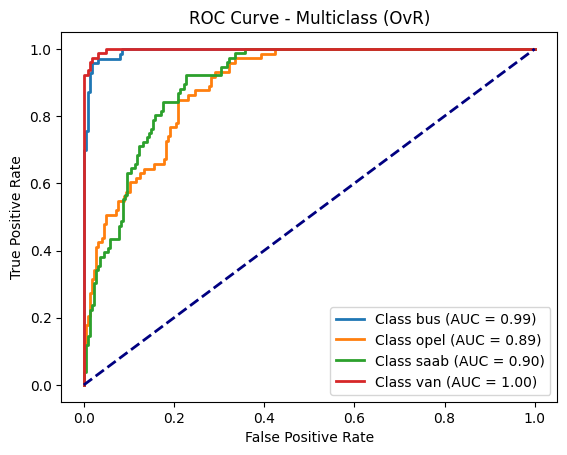

In [13]:
import matplotlib.pyplot as plt


plt.figure()
for i, class_label in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_bin[:, i], y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {class_label} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Multiclass (OvR)')
plt.legend(loc='lower right')
plt.show()

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

In [14]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train_scaled)

explained_variance = pca.explained_variance_ratio_

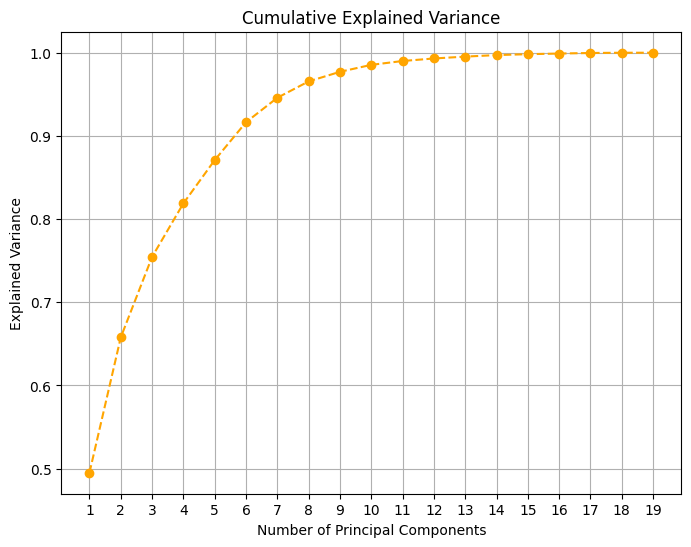

In [15]:
cumulative_variance = np.cumsum(explained_variance)
plt.figure(figsize=(8,6))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', linestyle='--', color='orange')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance')
plt.xticks(range(1, len(cumulative_variance)+1))
plt.grid(True)
plt.show()


In [16]:
cumulative_variance

array([0.49509159, 0.65777439, 0.75454525, 0.81891258, 0.87091725,
       0.91645856, 0.94586022, 0.96551858, 0.97704731, 0.98541553,
       0.99004099, 0.9930804 , 0.99532154, 0.99715972, 0.99823306,
       0.99900808, 0.99968826, 0.99998236, 1.        ])

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

Смотрим по результатам прошлого пункта на какой компоненте доля от общей дисперсии уже перестает сильно изменяться

In [17]:
pca = PCA(n_components=16)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Проверяем размерность
print(X_train_pca.shape)
print(X_test_pca.shape)   

(549, 16)
(297, 16)


**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [18]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

# Grid Search
grid = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

grid.fit(X_train_pca, y_train)

print("Best params:", grid.best_params_)
print("Best cross-val score:", grid.best_score_)

Best params: {'C': 100, 'penalty': 'l2'}
Best cross-val score: 0.795929941618015


c:\Users\vavil\OneDrive\Рабочий стол\projects\web_graphs\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [19]:
y_pred = grid.predict(X_test_pca)
y_pred_proba = grid.predict(X_test_pca)

accuracy = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average='macro')

print("accuracy: ", round(accuracy, 2))
print("f1 score: ", round(f1, 2))

accuracy:  0.8
f1 score:  0.8


То есть при 16 компонент из 19 метрика стало чуть хуже, особого смысла тут в PCA нет, так как признаков и так мало

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

Дереву без разницы на нормализацию признаков, но чтобы не запутаться буду использовать те же таблицы

In [29]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)

param_grid = {
    'max_depth': np.arange(8, 21),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid = GridSearchCV(estimator=dt, param_grid=param_grid,
                           cv=4, scoring='accuracy', n_jobs=-1)

grid.fit(X_train_scaled, y_train)

best_tree_params = grid.best_params_

print("Best parameters:", grid.best_params_)
print("Best cross-val score:", grid.best_score_)

Best parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best cross-val score: 0.6885115836242464


In [30]:
y_pred = grid.predict(X_test_scaled)
y_pred_proba = grid.predict(X_test_scaled)

accuracy = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average='macro')

print("accuracy: ", round(accuracy, 2))
print("f1 score: ", round(f1, 2))

accuracy:  0.69
f1 score:  0.69


#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [31]:
from sklearn.ensemble import BaggingClassifier

ensemble_sizes = list(range(2, 101, 5))
accuracy_lr = []
f1_lr = []
accuracy_tree = []
f1_tree = []

# Linear Regression Bagging
for N in ensemble_sizes:
    bag_lr = BaggingClassifier(
        estimator=LogisticRegression(**best_lr_params),
        n_estimators=N,
        bootstrap=True,
        random_state=42,
        n_jobs=-1
    )
    bag_lr.fit(X_train_scaled, y_train)
    y_pred = bag_lr.predict(X_test_scaled)
    accuracy_lr.append(accuracy_score(y_test, y_pred))
    f1_lr.append(f1_score(y_test, y_pred, average='macro'))


# Decision Tree Bagging
for N in ensemble_sizes:
    bag_tree = BaggingClassifier(
        estimator=DecisionTreeClassifier(**best_tree_params),
        n_estimators=N,
        bootstrap=True,
        random_state=42,
        n_jobs=-1
    )
    bag_tree.fit(X_train, y_train)
    y_pred = bag_tree.predict(X_test)
    accuracy_tree.append(accuracy_score(y_test, y_pred))
    f1_tree.append(f1_score(y_test, y_pred, average='macro'))

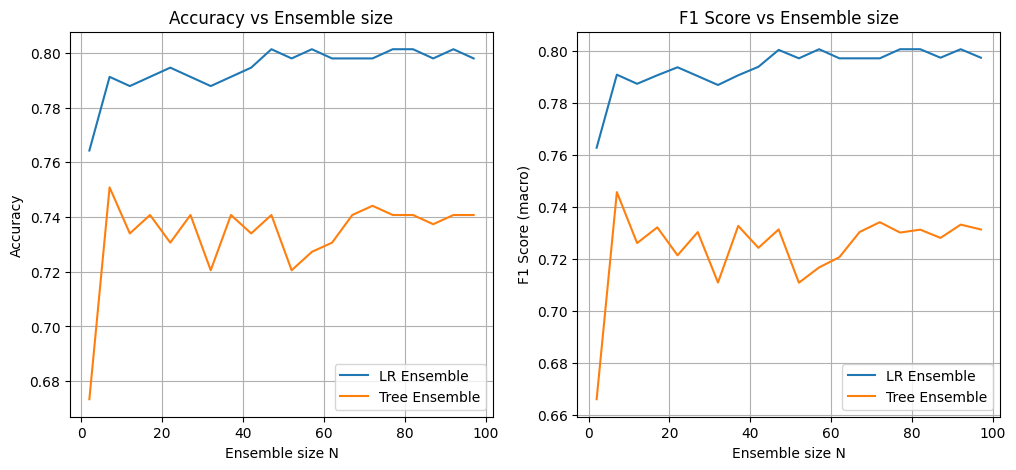

In [32]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(ensemble_sizes, accuracy_lr, label='LR Ensemble')
plt.plot(ensemble_sizes, accuracy_tree, label='Tree Ensemble')
plt.xlabel('Ensemble size N')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Ensemble size')
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(ensemble_sizes, f1_lr, label='LR Ensemble')
plt.plot(ensemble_sizes, f1_tree, label='Tree Ensemble')
plt.xlabel('Ensemble size N')
plt.ylabel('F1 Score (macro)')
plt.title('F1 Score vs Ensemble size')
plt.legend()
plt.grid(True)

plt.show()

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [ ]:
from sklearn.ensemble import RandomForestClassifier


n_trees = list(range(2, 101, 5))
accuracy_rf = []
f1_rf = []

# Инициализация Random Forest
for n in n_trees:
    rf = RandomForestClassifier(
        n_estimators=n,
        max_depth=best_tree_params['max_depth'],
        min_samples_split=best_tree_params['min_samples_split'],
        min_samples_leaf=best_tree_params['min_samples_leaf'],
        criterion=best_tree_params['criterion'],
        random_state=42,
        n_jobs=-1
    )
    rf.fit(X_train_scaled, y_train)
    y_pred = rf.predict(X_test_scaled)
    accuracy_rf.append(accuracy_score(y_test, y_pred))
    f1_rf.append(f1_score(y_test, y_pred, average='macro'))

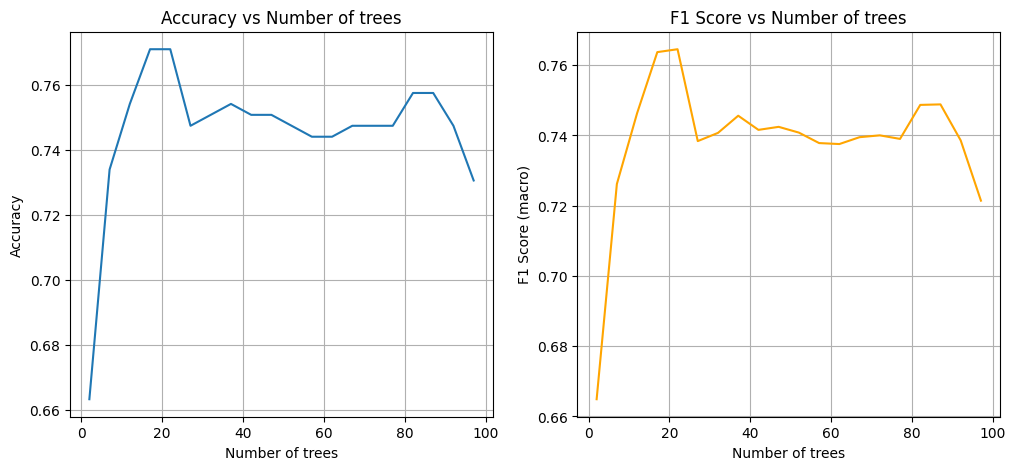

In [37]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(n_trees, accuracy_rf, label='Random Forest')
plt.xlabel('Number of trees')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of trees')
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(n_trees, f1_rf, label='Random Forest', color='orange')
plt.xlabel('Number of trees')
plt.ylabel('F1 Score (macro)')
plt.title('F1 Score vs Number of trees')
plt.grid(True)

plt.show()

In [41]:
best_rf_params = best_tree_params.copy()
best_rf_params["n_estimators"] = 22

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [ ]:
%%capture
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score

n_parts = 10
X_train_parts = np.array_split(X_train_scaled, n_parts)
y_train_parts = np.array_split(y_train, n_parts)

train_sizes = []
accuracy_lr = []
f1_lr = []
accuracy_tree = []
f1_tree = []
accuracy_rf = []
f1_rf = []

for i in range(1, n_parts+1):
    X_subset = np.vstack(X_train_parts[:i])
    y_subset = np.hstack(y_train_parts[:i])
    train_sizes.append(len(X_subset))
    
    # Logistic Regression
    lr = LogisticRegression(**best_lr_params)
    lr.fit(X_subset, y_subset)
    y_pred = lr.predict(X_test_scaled)
    accuracy_lr.append(accuracy_score(y_test, y_pred))
    f1_lr.append(f1_score(y_test, y_pred, average='macro'))
    
    # Decision Tree
    tree = DecisionTreeClassifier(**best_tree_params)
    tree.fit(X_subset, y_subset)
    y_pred = tree.predict(X_test_scaled)
    accuracy_tree.append(accuracy_score(y_test, y_pred))
    f1_tree.append(f1_score(y_test, y_pred, average='macro'))
    
    # Random Forest
    rf = RandomForestClassifier(**best_rf_params)
    rf.fit(X_subset, y_subset)
    y_pred = rf.predict(X_test_scaled)
    accuracy_rf.append(accuracy_score(y_test, y_pred))
    f1_rf.append(f1_score(y_test, y_pred, average='macro'))


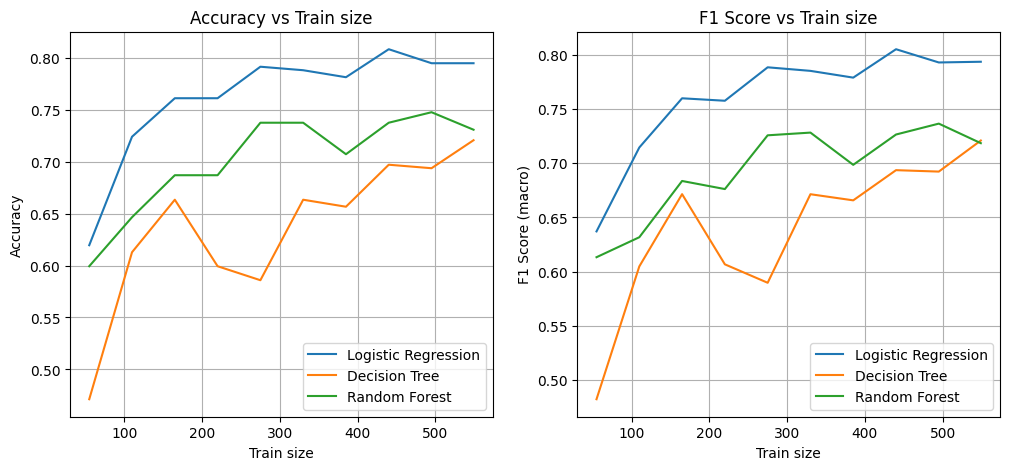

In [47]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(train_sizes, accuracy_lr, label='Logistic Regression')
plt.plot(train_sizes, accuracy_tree, label='Decision Tree')
plt.plot(train_sizes, accuracy_rf, label='Random Forest')
plt.xlabel('Train size')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Train size')
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(train_sizes, f1_lr, label='Logistic Regression')
plt.plot(train_sizes, f1_tree, label='Decision Tree')
plt.plot(train_sizes, f1_rf, label='Random Forest')
plt.xlabel('Train size')
plt.ylabel('F1 Score (macro)')
plt.title('F1 Score vs Train size')
plt.legend()
plt.grid(True)

plt.show()

С ростом количества данных метрики увеличиваются, что неудивительно, так как у нас просто мало данных

#### 2.9. Boosting
Your goal is to build a boosting ensemble using xgboost, CatBoost or lightgbm package.
Please, do not use the sklearn API for these models.

Find optimal number of decision trees in the boosting ensembe using grid search or other methods.
Please, explain your answer.

In [51]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train_scaled, label=y_train_encoded)
dtest = xgb.DMatrix(X_test_scaled, label=y_test_encoded)

In [54]:
params = {
    'objective': 'multi:softprob',
    'num_class': len(np.unique(y_train)),
    'eval_metric': 'mlogloss',
    'eta': 0.1,
    'max_depth': 4,             
    'seed': 42
}


In [ ]:
evallist = [(dtrain, 'train'), (dtest, 'eval')]

bst = xgb.train(
    params,
    dtrain,
    num_boost_round=500,
    evals=evallist,
    early_stopping_rounds=20, 
    verbose_eval=False
)

print("Best number of trees:", bst.best_iteration)

Best number of trees: 79


In [58]:
y_proba = bst.predict(dtest)  # shape = (n_samples, num_classes)
y_pred = np.argmax(y_proba, axis=1)

accuracy = accuracy_score(y_test_encoded, y_pred)
f1 = f1_score(y_test_encoded, y_pred, average='macro')

print("Test accuracy:", accuracy)
print("Test F1 (macro):", f1)

Test accuracy: 0.7811447811447811
Test F1 (macro): 0.7786343935688238
